In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.ensemble import RandomForestClassifier
import sklearn
from sklearn.metrics import classification_report

import wrangle
import explore
from model import model_df
pd.set_option('display.max_columns', None)

## Acquiring the Data

In [2]:
df = pd.read_csv('service_calls.csv')

## Preparing the Data

In [3]:
df = wrangle.clean_311(df)

In [4]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test, train_scaled, validate_scaled, test_scaled = wrangle.split_separate_scale(df)
north_df = train[(train['council_district'] == 9) | (train['council_district'] == 8)]
central_df = train[(train['council_district'] == 1) | (train['council_district'] == 5)]
east_df = train[(train['council_district'] == 10) | (train['council_district'] == 2)]

## Explore

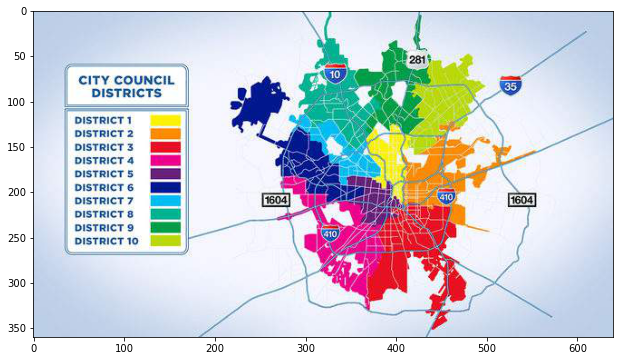

In [5]:
# A map for visualizing where each district lies.

plt.subplots(figsize=(16, 6))
img = mpimg.imread('council_map.jpg')
imgplot = plt.imshow(img)
plt.show()

### Explore by Counts of Levels of Delay

Text(0.5, 1.0, 'Northern Levels of Delay')

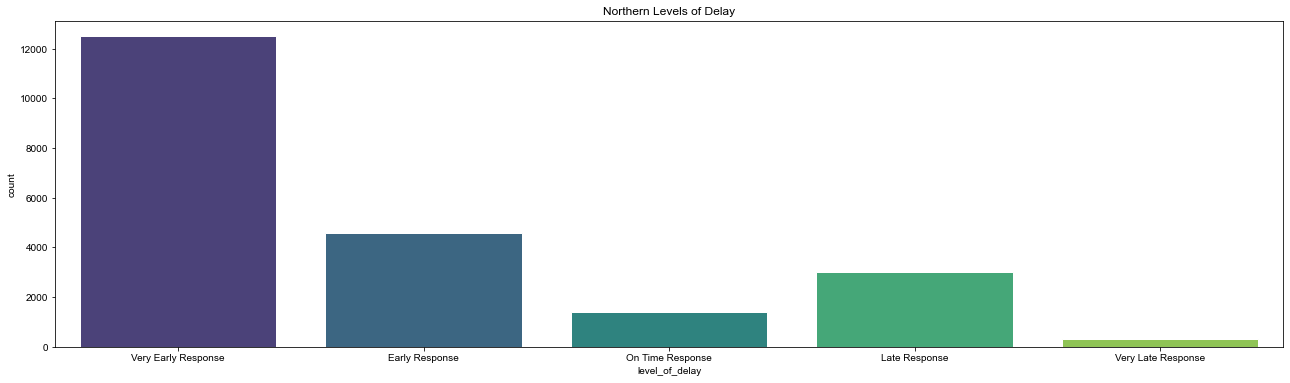

In [6]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = north_df, x = 'level_of_delay', palette = "viridis").set_title('Northern Levels of Delay')

Text(0.5, 1.0, 'Downtown Levels of Delay')

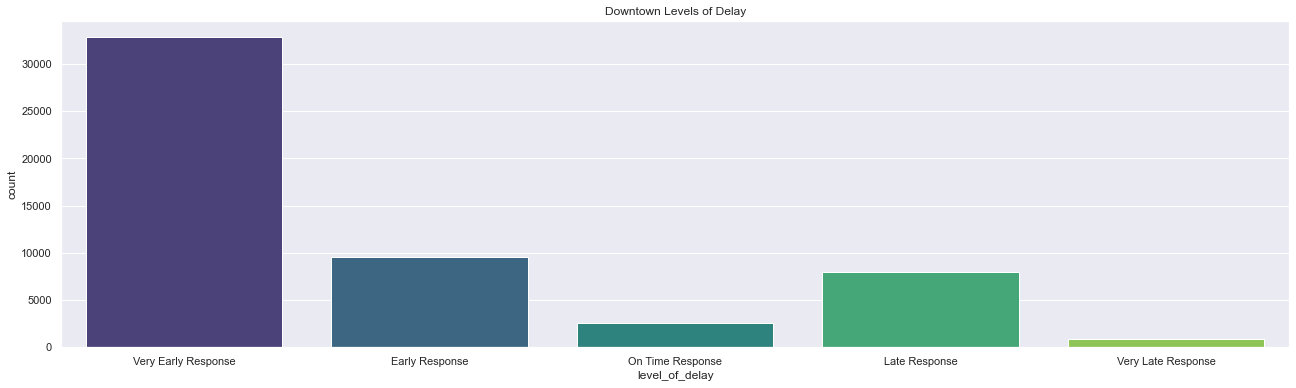

In [7]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = central_df, x = 'level_of_delay', palette = "viridis").set_title('Downtown Levels of Delay')

Text(0.5, 1.0, 'Eastern Levels of Delay')

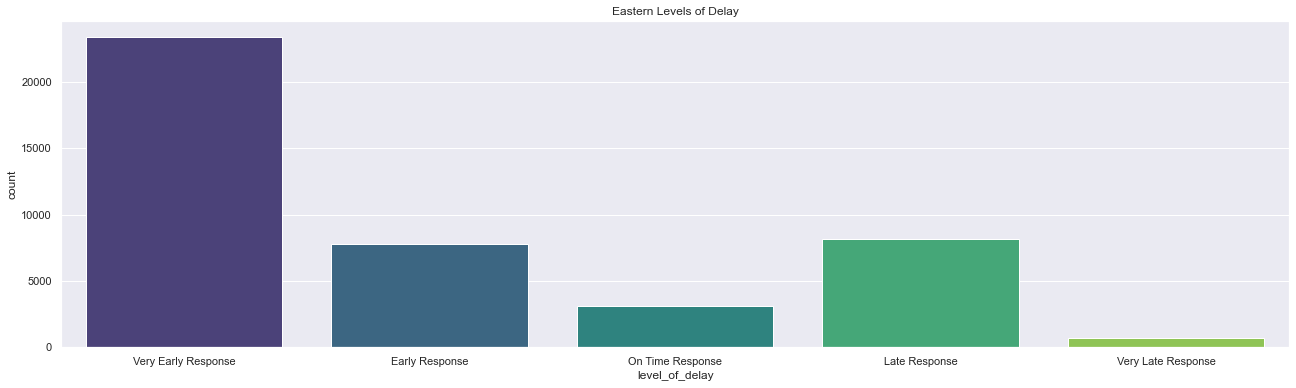

In [8]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = east_df, x = 'level_of_delay', palette = "viridis").set_title('Eastern Levels of Delay')

### Explore by Average Response Time by Department

Text(0.5, 1.0, 'North Average Days Before or After Due Date by Department')

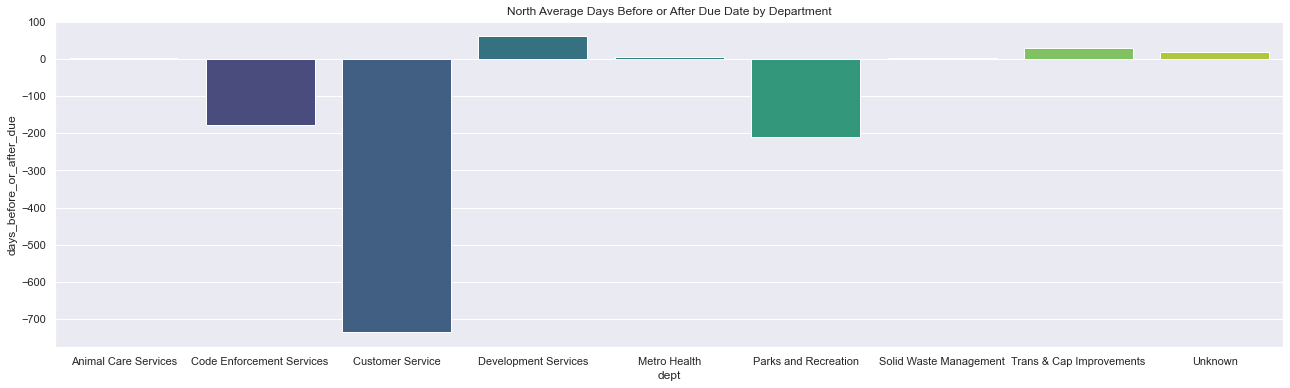

In [9]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = north_df.groupby('dept').mean().reset_index(), x = 'dept', y = 'days_before_or_after_due', palette = "viridis").set_title('North Average Days Before or After Due Date by Department')

Text(0.5, 1.0, 'Downtown Average Days Before or After Due Date by Department')

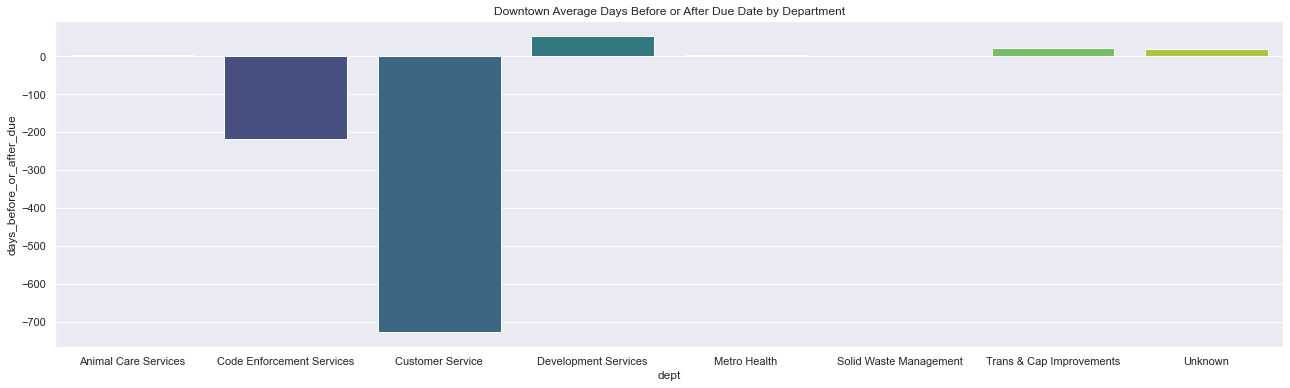

In [10]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = central_df.groupby('dept').mean().reset_index(), x = 'dept', y = 'days_before_or_after_due', palette = "viridis").set_title('Downtown Average Days Before or After Due Date by Department')

Text(0.5, 1.0, 'East Average Days Before or After Due Date by Department')

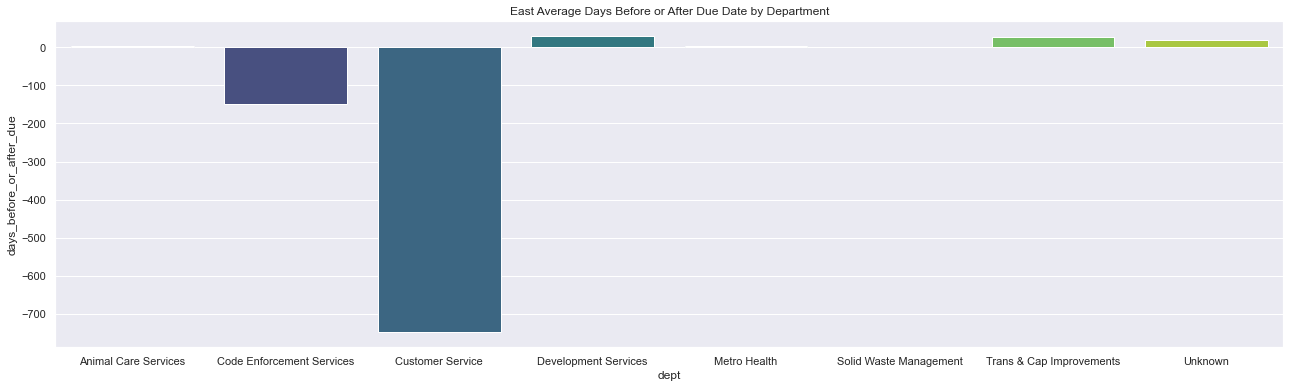

In [11]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = east_df.groupby('dept').mean().reset_index(), x = 'dept', y = 'days_before_or_after_due', palette = "viridis").set_title('East Average Days Before or After Due Date by Department')

### Explore by Median Response Time by Department

Text(0.5, 1.0, 'North Median Days Before or After Due Date by Department')

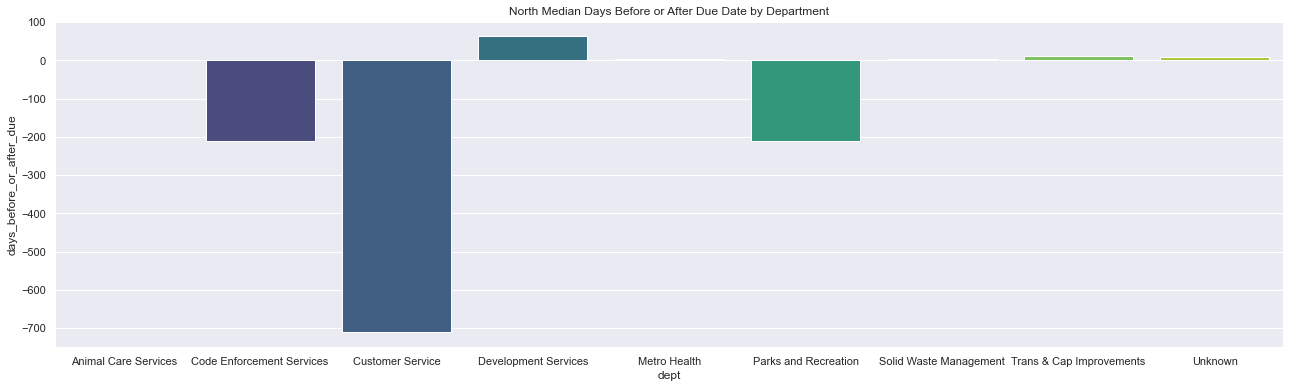

In [12]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = north_df.groupby('dept').median().reset_index(), x = 'dept', y = 'days_before_or_after_due', palette = "viridis").set_title('North Median Days Before or After Due Date by Department')

Text(0.5, 1.0, 'Downtown Median Days Before or After Due Date by Department')

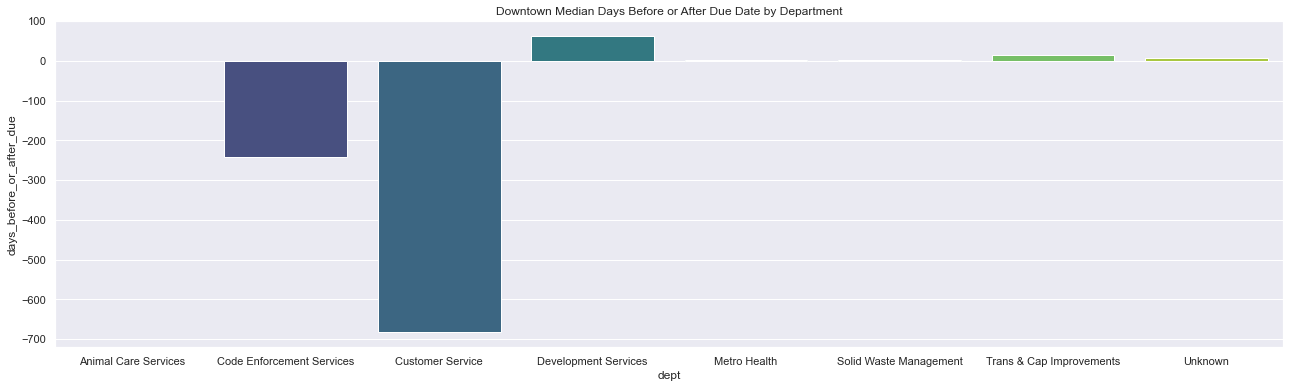

In [13]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = central_df.groupby('dept').median().reset_index(), x = 'dept', y = 'days_before_or_after_due', palette = "viridis").set_title('Downtown Median Days Before or After Due Date by Department')

Text(0.5, 1.0, 'East Median Days Before or After Due Date by Department')

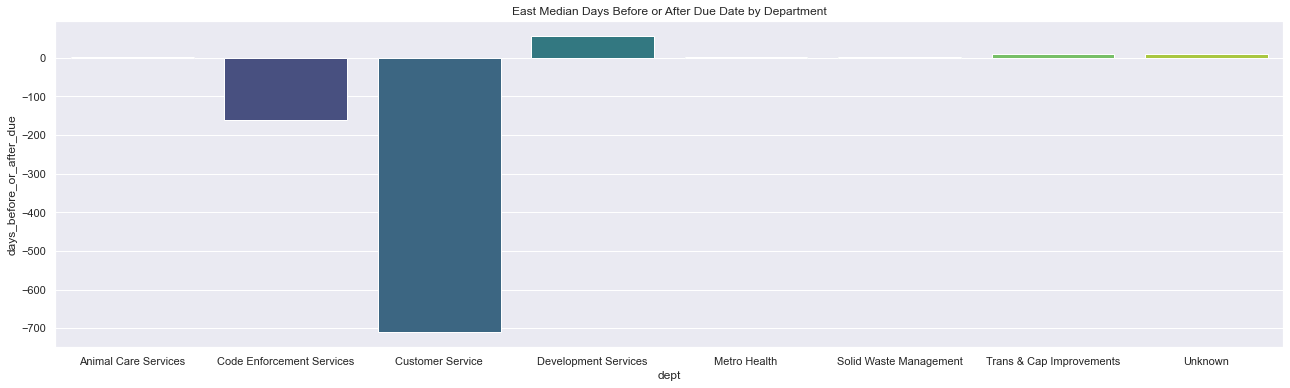

In [14]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = east_df.groupby('dept').median().reset_index(), x = 'dept', y = 'days_before_or_after_due', palette = "viridis").set_title('East Median Days Before or After Due Date by Department')

### Explore by Median Response Time by Reason for Call

Text(0.5, 1.0, 'North Median Days Before or After Due Date by Call Reason')

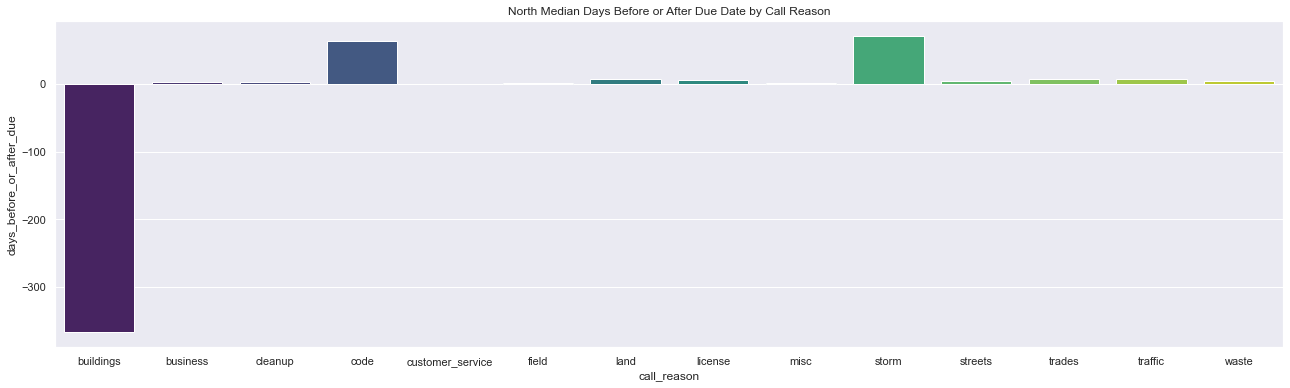

In [15]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = north_df.groupby('call_reason').median().reset_index(), x = 'call_reason', y = 'days_before_or_after_due', palette = "viridis").set_title('North Median Days Before or After Due Date by Call Reason')

Text(0.5, 1.0, 'Downtown Median Days Before or After Due Date by Call Reason')

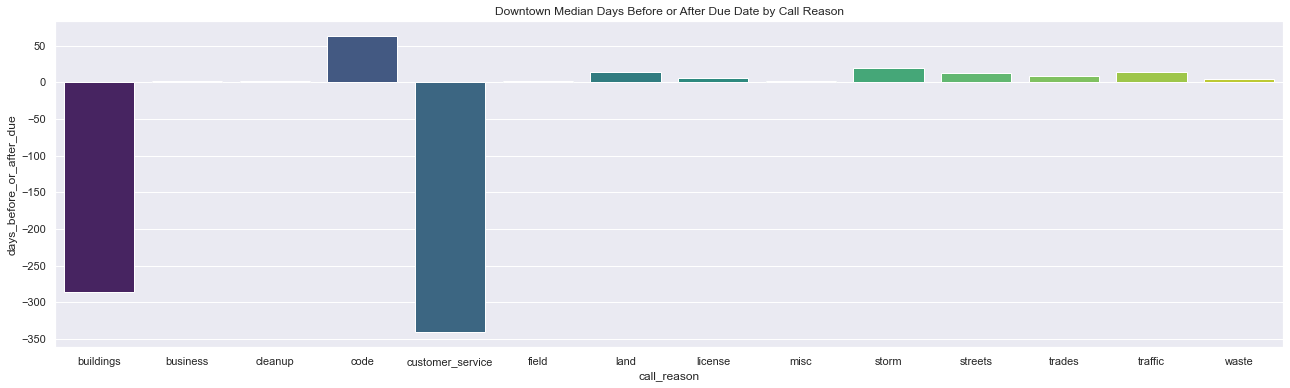

In [16]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = central_df.groupby('call_reason').median().reset_index(), x = 'call_reason', y = 'days_before_or_after_due', palette = "viridis").set_title('Downtown Median Days Before or After Due Date by Call Reason')

Text(0.5, 1.0, 'East Median Days Before or After Due Date by Call Reason')

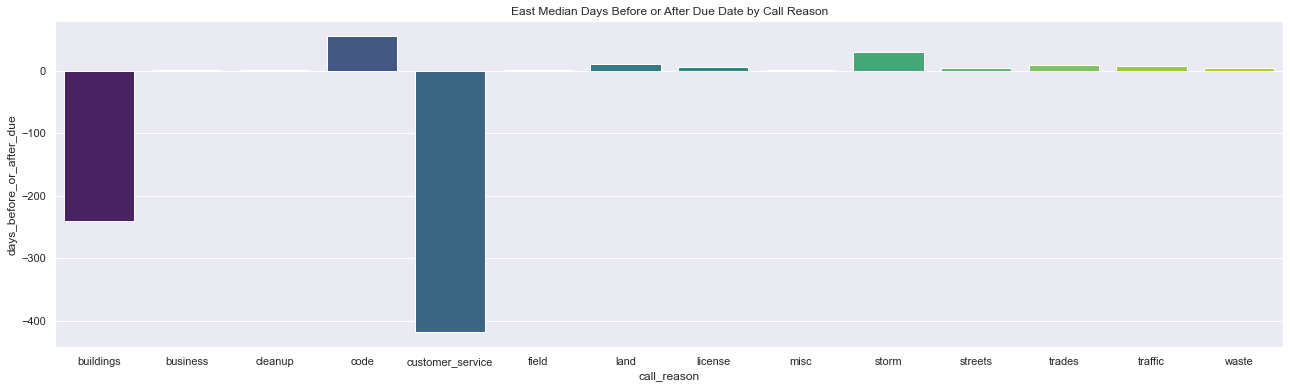

In [17]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = east_df.groupby('call_reason').median().reset_index(), x = 'call_reason', y = 'days_before_or_after_due', palette = "viridis").set_title('East Median Days Before or After Due Date by Call Reason')

### Counts of Calls by Department for each Region

Text(0.5, 1.0, 'North Number of Calls by Call Reason')

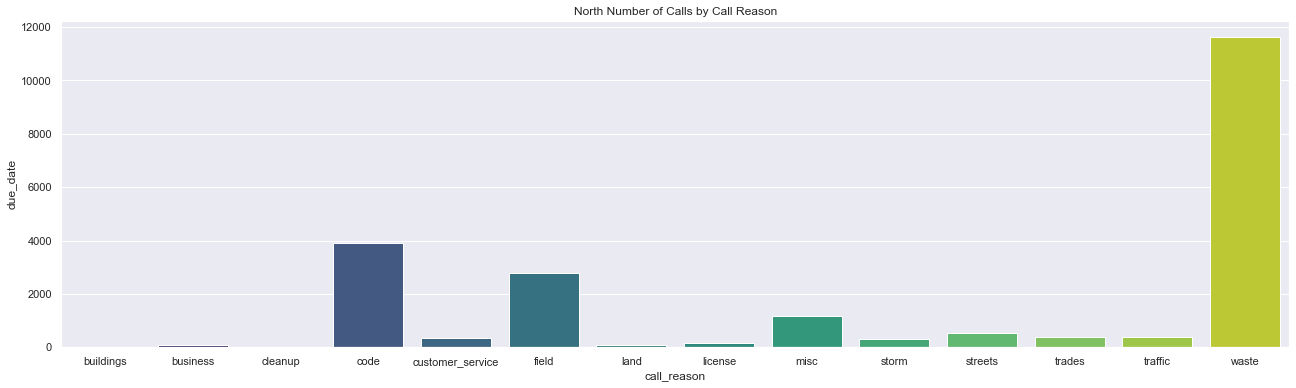

In [18]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = north_df.groupby('call_reason').count().reset_index(), x = 'call_reason', y = 'due_date', palette = "viridis").set_title('North Number of Calls by Call Reason')

Text(0.5, 1.0, 'Downtown Number of Calls by Call Reason')

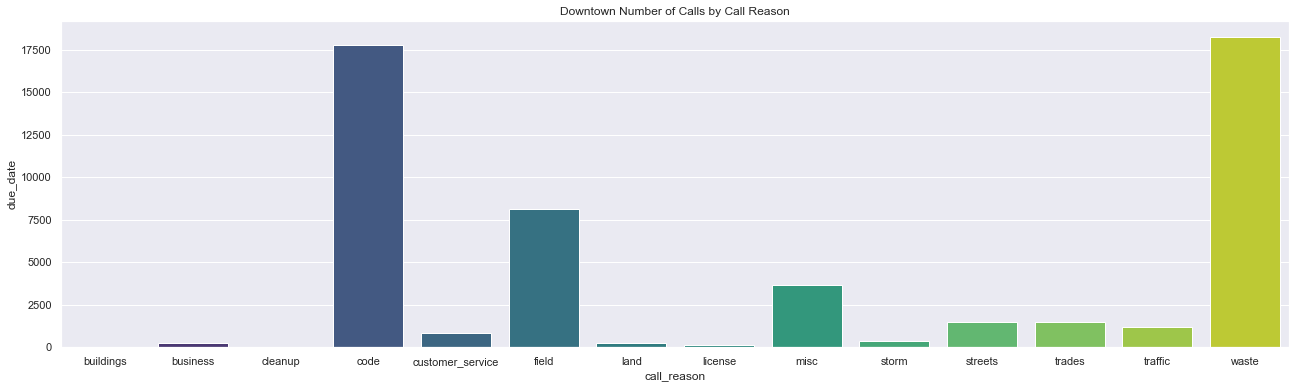

In [19]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = central_df.groupby('call_reason').count().reset_index(), x = 'call_reason', y = 'due_date', palette = "viridis").set_title('Downtown Number of Calls by Call Reason')

Text(0.5, 1.0, 'East Number of Calls by Call Reason')

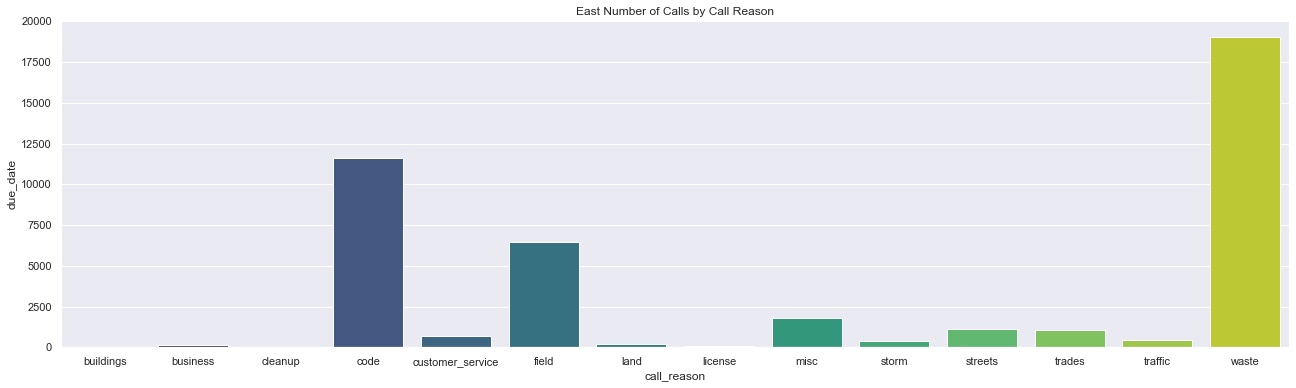

In [20]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = east_df.groupby('call_reason').count().reset_index(), x = 'call_reason', y = 'due_date', palette = "viridis").set_title('East Number of Calls by Call Reason')

In [30]:
fall_winter = train[(train['open_month'] >= 10) | (train['open_month'] < 4)]
spring_summer = train[(train['open_month'] < 10) & (train['open_month'] >= 4)]
fall_winter = fall_winter[fall_winter['dept'] != 'Parks and Recreation']
spring_summer = spring_summer[spring_summer['dept'] != 'Parks and Recreation']

Text(0.5, 1.0, 'Count of Calls by Department')

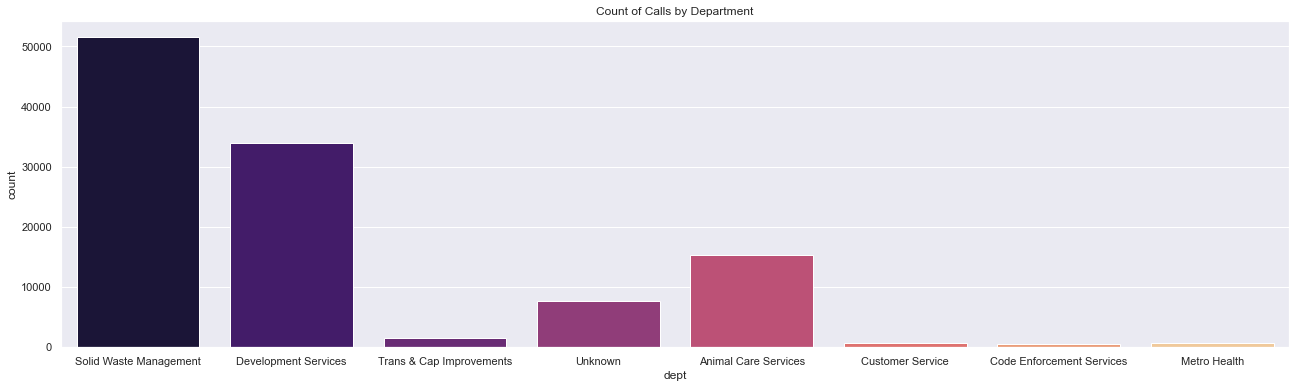

In [31]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = spring_summer, x = 'dept', palette = 'magma').set_title('Count of Calls by Department')

Text(0.5, 1.0, 'Count of Calls by Department')

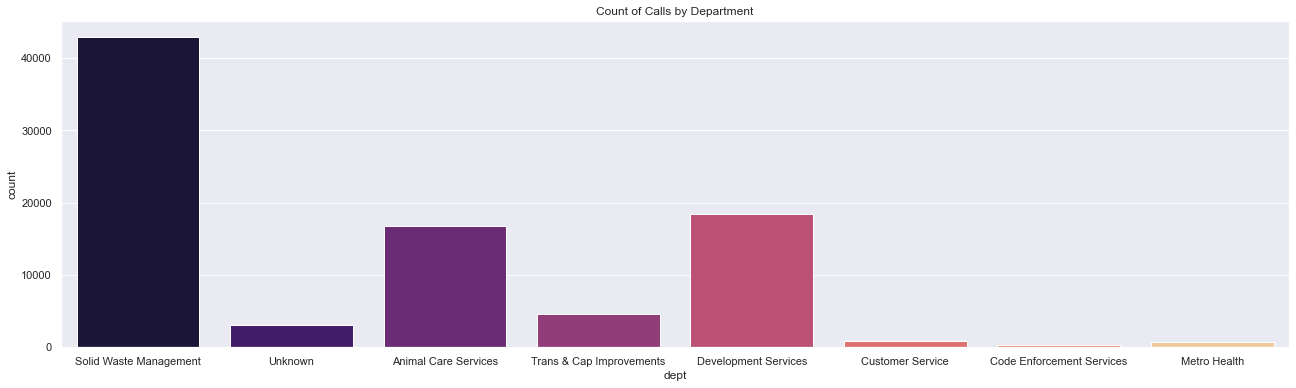

In [32]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = fall_winter, x = 'dept', palette = 'magma').set_title('Count of Calls by Department')

In [35]:
bleh_sum = spring_summer.groupby('dept').count()
bleh_sum['perc_of_calls'] = bleh_sum.open_date.apply(lambda x: x/112532)
bleh_sum.drop(bleh_sum.columns.difference(['perc_of_calls']),1, inplace=True)
bleh_sum = bleh_sum.reset_index()
bleh_sum['perc_of_calls'] = bleh_sum.perc_of_calls.apply(lambda x: round(x*100, 2))
bleh_sum['Season'] = 'Spring & Summer'

In [36]:
bleh_win = fall_winter.groupby('dept').count()
bleh_win['perc_of_calls'] = bleh_win.open_date.apply(lambda x: x/87278)
bleh_win.drop(bleh_win.columns.difference(['perc_of_calls']),1, inplace=True)
bleh_win = bleh_win.reset_index()
bleh_win['perc_of_calls'] = bleh_win.perc_of_calls.apply(lambda x: round(x*100, 2))
bleh_win['Season'] = 'Fall & Winter'

In [53]:
all_seas = pd.concat([bleh_win, bleh_sum], axis=0)
all_seas = all_seas.replace('Trans & Cap Improvements', 'Trans and Infr')

(0.0, 50.0)

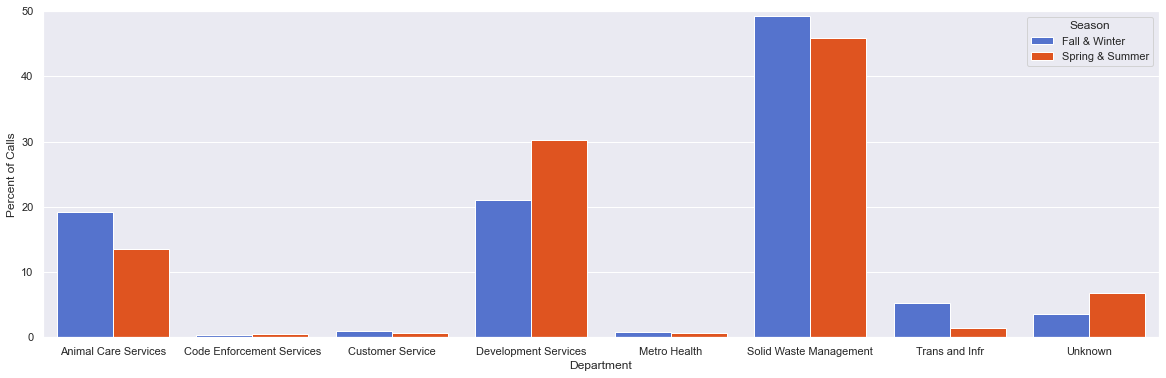

In [67]:
plt.subplots(figsize=(20, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = all_seas, x = 'dept', y = 'perc_of_calls', palette = ["royalblue", 'orangered'], hue = 'Season')
plt.xlabel('Department')
plt.ylabel('Percent of Calls')
plt.ylim(0, 50)

(0.0, 50.0)

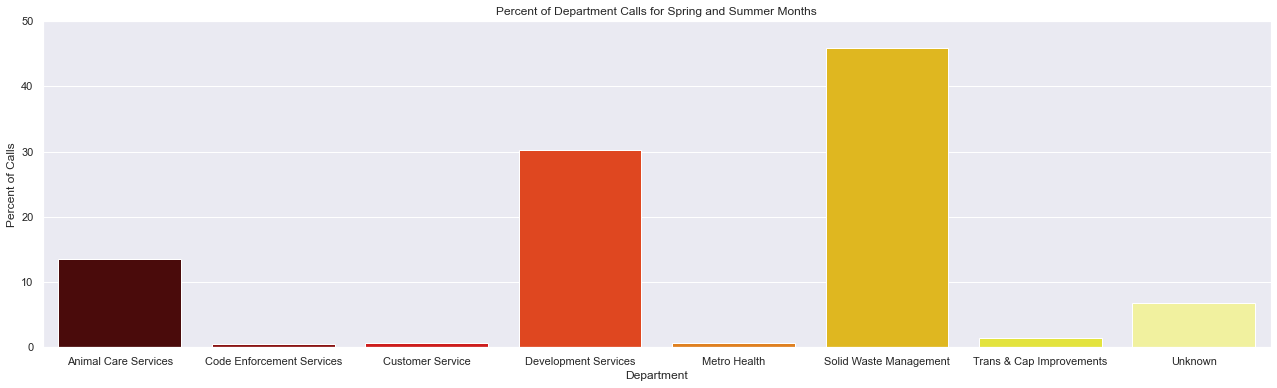

In [39]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = bleh_sum, x = 'dept', y = 'perc_of_calls', palette = "hot").set_title('Percent of Department Calls for Spring and Summer Months')
plt.xlabel('Department')
plt.ylabel('Percent of Calls')
plt.ylim(0, 50)

Text(0, 0.5, 'Average Response Time')

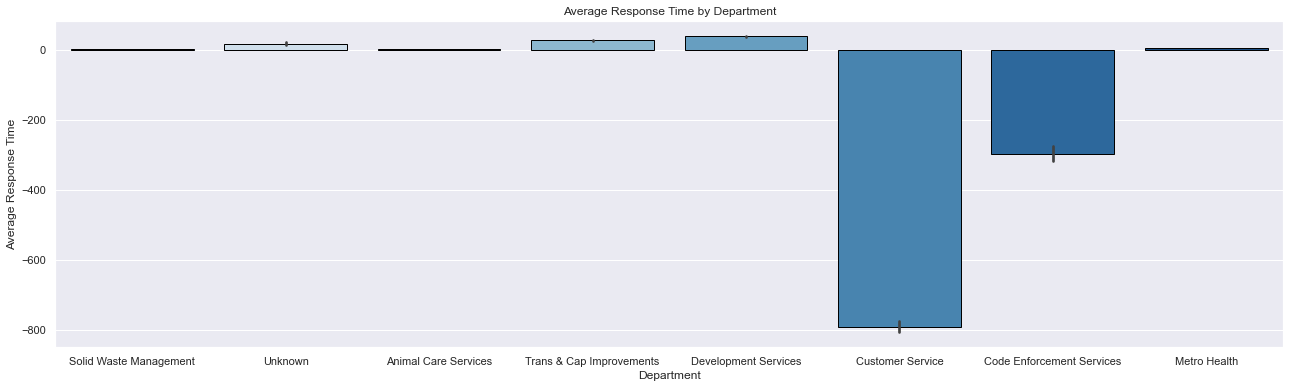

In [40]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = fall_winter, x = 'dept', y = 'days_before_or_after_due', palette = "Blues", edgecolor = 'black').set_title('Average Response Time by Department')
plt.xlabel('Department')
plt.ylabel('Average Response Time')

<AxesSubplot:xlabel='level_of_delay', ylabel='count'>

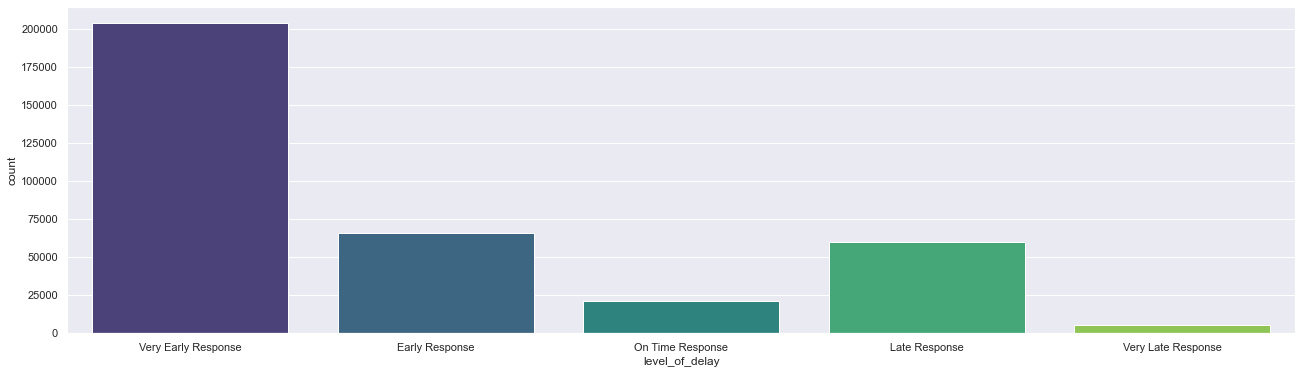

In [41]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = df, x = 'level_of_delay', palette = "viridis")

## Statistical Test for Difference in Response Time During Fall and Winter

In [42]:
fall_winter.groupby('open_month').count()

,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,level_of_delay,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_year,open_week,per_capita_income,square_miles
open_month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421,13421
2,13171,13171,13171,13171,13171,13171,13171,13171,13171,13171,13171,13171,13171,13171,13171,13171,13171,13171,13171,13171,13171,13171,13171,13171,13171,13171,13171,13171,13171,13171,13171,13171,13171,13171,13171
3,19522,19522,19522,19522,19522,19522,19522,19522,19522,19522,19522,19522,19522,19522,19522,19522,19522,19522,19522,19522,19522,19522,19522,19522,19522,19522,19522,19522,19522,19522,19522,19522,19522,19522,19522
10,14444,14444,14444,14444,14444,14444,14444,14444,14444,14444,14444,14444,14444,14444,14444,14444,14444,14444,14444,14444,14444,14444,14444,14444,14444,14444,14444,14444,14444,14444,14444,14444,14444,14444,14444
11,13880,13880,13880,13880,13880,13880,13880,13880,13880,13880,13880,13880,13880,13880,13880,13880,13880,13880,13880,13880,13880,13880,13880,13880,13880,13880,13880,13880,13880,13880,13880,13880,13880,13880,13880
12,13218,13218,13218,13218,13218,13218,13218,13218,13218,13218,13218,13218,13218,13218,13218,13218,13218,13218,13218,13218,13218,13218,13218,13218,13218,13218,13218,13218,13218,13218,13218,13218,13218,13218,13218


In [43]:
spring_summer.groupby('open_month').count()

,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,level_of_delay,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_year,open_week,per_capita_income,square_miles
open_month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,20411,20411,20411,20411,20411,20411,20411,20411,20411,20411,20411,20411,20411,20411,20411,20411,20411,20411,20411,20411,20411,20411,20411,20411,20411,20411,20411,20411,20411,20411,20411,20411,20411,20411,20411
5,18873,18873,18873,18873,18873,18873,18873,18873,18873,18873,18873,18873,18873,18873,18873,18873,18873,18873,18873,18873,18873,18873,18873,18873,18873,18873,18873,18873,18873,18873,18873,18873,18873,18873,18873
6,20622,20622,20622,20622,20622,20622,20622,20622,20622,20622,20622,20622,20622,20622,20622,20622,20622,20622,20622,20622,20622,20622,20622,20622,20622,20622,20622,20622,20622,20622,20622,20622,20622,20622,20622
7,19407,19407,19407,19407,19407,19407,19407,19407,19407,19407,19407,19407,19407,19407,19407,19407,19407,19407,19407,19407,19407,19407,19407,19407,19407,19407,19407,19407,19407,19407,19407,19407,19407,19407,19407
8,17891,17891,17891,17891,17891,17891,17891,17891,17891,17891,17891,17891,17891,17891,17891,17891,17891,17891,17891,17891,17891,17891,17891,17891,17891,17891,17891,17891,17891,17891,17891,17891,17891,17891,17891
9,14949,14949,14949,14949,14949,14949,14949,14949,14949,14949,14949,14949,14949,14949,14949,14949,14949,14949,14949,14949,14949,14949,14949,14949,14949,14949,14949,14949,14949,14949,14949,14949,14949,14949,14949


In [44]:
stats.mannwhitneyu(fall_winter.days_before_or_after_due, spring_summer.days_before_or_after_due)

MannwhitneyuResult(statistic=4506951398.0, pvalue=1.0209754652320899e-224)

In [45]:
fall_winter.days_before_or_after_due.mean(), spring_summer.days_before_or_after_due.mean()

(2.788171944875422, 12.535643273028809)

In [46]:
waste = df[df['dept'] == 'Solid Waste Management']
dev = df[df['dept'] == 'Development Services']
animals = df[df['dept'] == 'Animal Care Services']
code = df[df['dept'] == 'Code Enforcement Services']

In [47]:
waste_reasons = waste.groupby('case_type').count()
waste_reasons.sort_values(by = 'open_date', ascending = False)

,open_date,due_date,closed_date,is_late,dept,call_reason,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,level_of_delay,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_month,open_year,open_week,per_capita_income,square_miles
case_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No Pickup,58114,58114,58114,58114,58114,58114,58114,58114,58114,58114,58114,58114,58114,58114,58114,58114,58114,58114,58114,58114,58114,58114,58114,58114,58114,58114,58114,58114,58114,58114,58114,58114,58114,58114,58114
Carts(Damaged Cart),19442,19442,19442,19442,19442,19442,19442,19442,19442,19442,19442,19442,19442,19442,19442,19442,19442,19442,19442,19442,19442,19442,19442,19442,19442,19442,19442,19442,19442,19442,19442,19442,19442,19442,19442
Dead Animal Pick Up,18139,18139,18139,18139,18139,18139,18139,18139,18139,18139,18139,18139,18139,18139,18139,18139,18139,18139,18139,18139,18139,18139,18139,18139,18139,18139,18139,18139,18139,18139,18139,18139,18139,18139,18139
Carts(Cart Exchange),15537,15537,15537,15537,15537,15537,15537,15537,15537,15537,15537,15537,15537,15537,15537,15537,15537,15537,15537,15537,15537,15537,15537,15537,15537,15537,15537,15537,15537,15537,15537,15537,15537,15537,15537
Carts(Lost-Stolen),12239,12239,12239,12239,12239,12239,12239,12239,12239,12239,12239,12239,12239,12239,12239,12239,12239,12239,12239,12239,12239,12239,12239,12239,12239,12239,12239,12239,12239,12239,12239,12239,12239,12239,12239
Carts(Cart Delivery),10058,10058,10058,10058,10058,10058,10058,10058,10058,10058,10058,10058,10058,10058,10058,10058,10058,10058,10058,10058,10058,10058,10058,10058,10058,10058,10058,10058,10058,10058,10058,10058,10058,10058,10058
Carts(AdditionalCart),6318,6318,6318,6318,6318,6318,6318,6318,6318,6318,6318,6318,6318,6318,6318,6318,6318,6318,6318,6318,6318,6318,6318,6318,6318,6318,6318,6318,6318,6318,6318,6318,6318,6318,6318
Carts(Removed from Service),4584,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584
Out of Cycle(Leaves No Fee),4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532,4532


In [48]:
dev_reasons = dev.groupby('case_type').count()
dev_reasons.sort_values(by = 'open_date', ascending = False)

,open_date,due_date,closed_date,is_late,dept,call_reason,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,level_of_delay,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_month,open_year,open_week,per_capita_income,square_miles
case_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Overgrown Yard/Trash,20975,20975,20975,20975,20975,20975,20975,20975,20975,20975,20975,20975,20975,20975,20975,20975,20975,20975,20975,20975,20975,20975,20975,20975,20975,20975,20975,20975,20975,20975,20975,20975,20975,20975,20975
Sidewalk Obstructions (Bandit Signs),10385,10385,10385,10385,10385,10385,10385,10385,10385,10385,10385,10385,10385,10385,10385,10385,10385,10385,10385,10385,10385,10385,10385,10385,10385,10385,10385,10385,10385,10385,10385,10385,10385,10385,10385
Graffiti (Private Property),6238,6238,6238,6238,6238,6238,6238,6238,6238,6238,6238,6238,6238,6238,6238,6238,6238,6238,6238,6238,6238,6238,6238,6238,6238,6238,6238,6238,6238,6238,6238,6238,6238,6238,6238
Illegal Parking (Front-Side Yard Parking),5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151,5151
Vacant/Overgrown Property,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998
Overgrown Yard/Trash (Alley Way Maintenance),4694,4694,4694,4694,4694,4694,4694,4694,4694,4694,4694,4694,4694,4694,4694,4694,4694,4694,4694,4694,4694,4694,4694,4694,4694,4694,4694,4694,4694,4694,4694,4694,4694,4694,4694
Junk Vehicle,4354,4354,4354,4354,4354,4354,4354,4354,4354,4354,4354,4354,4354,4354,4354,4354,4354,4354,4354,4354,4354,4354,4354,4354,4354,4354,4354,4354,4354,4354,4354,4354,4354,4354,4354
Illegal Parking (ROW Obstruction),3721,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721,3721
Permits (Building Without A Permit),3633,3633,3633,3633,3633,3633,3633,3633,3633,3633,3633,3633,3633,3633,3633,3633,3633,3633,3633,3633,3633,3633,3633,3633,3633,3633,3633,3633,3633,3633,3633,3633,3633,3633,3633


In [49]:
animal_reasons = animals.groupby('case_type').count()
animal_reasons.sort_values(by = 'open_date', ascending = False)

,open_date,due_date,closed_date,is_late,dept,call_reason,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,level_of_delay,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_month,open_year,open_week,per_capita_income,square_miles
case_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Animals(Public Nuisance),9291,9291,9291,9291,9291,9291,9291,9291,9291,9291,9291,9291,9291,9291,9291,9291,9291,9291,9291,9291,9291,9291,9291,9291,9291,9291,9291,9291,9291,9291,9291,9291,9291,9291,9291
Animals(Aggressive Non-Critical),7980,7980,7980,7980,7980,7980,7980,7980,7980,7980,7980,7980,7980,7980,7980,7980,7980,7980,7980,7980,7980,7980,7980,7980,7980,7980,7980,7980,7980,7980,7980,7980,7980,7980,7980
Cruelty Neglect(Animal Neglect),7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963
Trapped/Confined,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539
Animals(Stray Animal),7058,7058,7058,7058,7058,7058,7058,7058,7058,7058,7058,7058,7058,7058,7058,7058,7058,7058,7058,7058,7058,7058,7058,7058,7058,7058,7058,7058,7058,7058,7058,7058,7058,7058,7058
Injured-Sick Animal,5812,5812,5812,5812,5812,5812,5812,5812,5812,5812,5812,5812,5812,5812,5812,5812,5812,5812,5812,5812,5812,5812,5812,5812,5812,5812,5812,5812,5812,5812,5812,5812,5812,5812,5812
Animals(Aggressive Critical),4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617
Cruelty-Neglect(Animal Cruelty),2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284
Animal Bite(Non-Critical),1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [50]:
code_reasons = code.groupby('case_type').count()
code_reasons.sort_values(by = 'open_date', ascending = False)

,open_date,due_date,closed_date,is_late,dept,call_reason,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,level_of_delay,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_month,open_year,open_week,per_capita_income,square_miles
case_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Vacant Lot-Private (12"")",609,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609
Overgrown Yard/Trash,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183
"Vacant Lot-Private (48"")",136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136
"Vacant Lot-City (12"")",89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89
Minimum Housing-Tenant Occupied,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87
Minimum Housing-Owner Occupied,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75
Junk Vehicle On Private Property,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67
Lot-Private (1000),58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58
Zoning Business in Resident Area,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
